In [1]:
from sahi.slicing import slice_coco
from sahi.utils.file import load_json

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

## Inspect the non sliced images

In [35]:
with open("/rds/general/user/jrb21/home/small-object-detection-benchmark/data/xview/coco/train_cars_trucks.json") as train_file:
    data_train_no_slice = json.load(train_file)

In [36]:
data_train_no_slice['images'][0]

{'height': 2931, 'width': 3093, 'id': 1, 'file_name': '5.tif'}

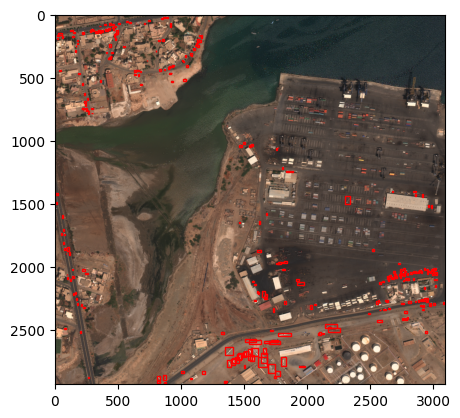

In [43]:
bboxes = []
for ann in data_train_no_slice['annotations']:
    if ann['image_id'] == 1:
        bbox = ann['bbox']
        bboxes.append(bbox)
        
im = Image.open('/rds/general/user/jrb21/home/train/train_images/5.tif')

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)

for x,y,w,h in bboxes:
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()

## Slicing

### Split the train set

In [2]:
coco_dict, coco_path = slice_coco(
    coco_annotation_file_path="/rds/general/user/jrb21/home/small-object-detection-benchmark/data/xview/coco/train_cars_trucks.json",
    image_dir="/rds/general/user/jrb21/home/train/train_images/",
    output_coco_annotation_file_name="slice_train_images",
    ignore_negative_samples=True,
    output_dir="/rds/general/user/jrb21/home/train/slice_train_images/",
    slice_height=400,
    slice_width=400,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    min_area_ratio=0.1,
    verbose=False,
    out_ext = '.png'
)

indexing coco dataset annotations...


100%|██████████| 538/538 [22:57<00:00,  2.56s/it]


### Split the validation set

In [3]:
coco_dict, coco_path = slice_coco(
    coco_annotation_file_path="/rds/general/user/jrb21/home/small-object-detection-benchmark/data/xview/coco/val_cars_trucks.json",
    image_dir="/rds/general/user/jrb21/home/train/train_images/",
    output_coco_annotation_file_name="slice_valid_images",
    ignore_negative_samples=True,
    output_dir="/rds/general/user/jrb21/home/train/slice_valid_images/",
    slice_height=400,
    slice_width=400,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    min_area_ratio=0.1,
    verbose=False,
    out_ext = '.png'
)

indexing coco dataset annotations...


100%|██████████| 181/181 [06:03<00:00,  2.01s/it]


### Convert the coco split dataset into YOLO

## Check the bounding boxes

### Train set

In [5]:
with open("/rds/general/user/jrb21/home/train/slice_train_images/slice_train_images_coco.json") as train_file:
    data_train = json.load(train_file)

In [6]:
data_train['images'][1]

{'height': 400, 'width': 400, 'id': 2, 'file_name': '5_320_0_720_400.png'}

In [30]:
for x in data_train['images']:
    if x['file_name'] == '5_320_0_720_400.png':
        print(x)

{'height': 400, 'width': 400, 'id': 2, 'file_name': '5_320_0_720_400.png'}


In [7]:
bboxes = []
for ann in data_train['annotations']:
    if ann['image_id'] == 2:
        bbox = ann['bbox']
        bboxes.append(bbox)

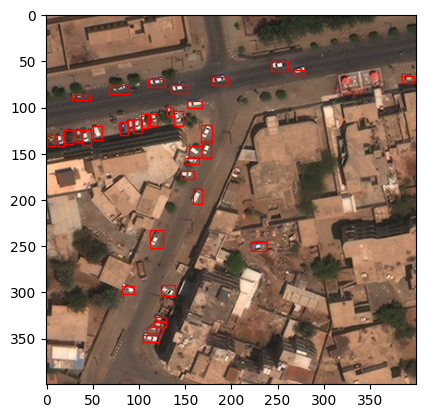

In [9]:
im = Image.open('/rds/general/user/jrb21/home/train/slice_train_images/5_320_0_720_400.png')

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)

for x,y,w,h in bboxes:
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()

In [10]:
bboxes = []
for ann in data_train['annotations']:
    if ann['image_id'] == 16:
        bbox = ann['bbox']
        bboxes.append(bbox)

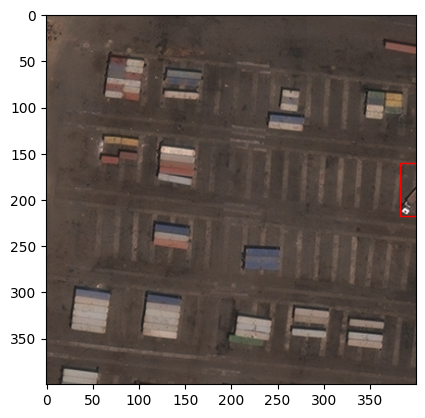

In [11]:
im = Image.open('/rds/general/user/jrb21/home/train/slice_train_images/5_1920_1280_2320_1680.png')

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)

for x,y,w,h in bboxes:
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()

### Validation set

In [31]:
data_valid['images'][0]

{'height': 400, 'width': 400, 'id': 1, 'file_name': '40_0_0_400_400.png'}

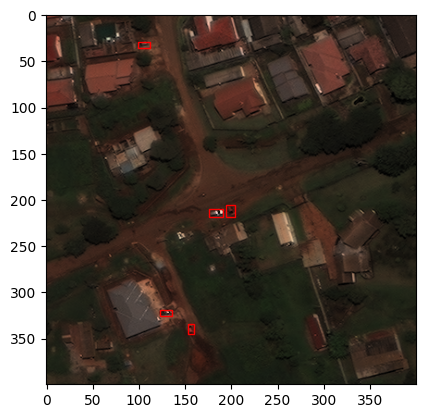

In [40]:
with open("/rds/general/user/jrb21/home/train/slice_valid_images/slice_valid_images_coco.json") as valid_file:
    data_valid = json.load(valid_file)

bboxes = []
for ann in data_valid['annotations']:
    if ann['image_id'] == 1:
        bbox = ann['bbox']
        bboxes.append(bbox)
    
im = Image.open('/rds/general/user/jrb21/home/train/slice_valid_images/40_0_0_400_400.png')

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)

for x,y,w,h in bboxes:
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    
plt.show()

In [26]:
for x in data_valid['images']:
    if x['file_name'] == '2509_640_0_1040_400.png':
        print(x)

{'height': 400, 'width': 400, 'id': 5388, 'file_name': '2509_640_0_1040_400.png'}


{'iscrowd': 0, 'image_id': 5388, 'bbox': [135, 41, 13, 16], 'segmentation': [[135, 41, 135, 57, 148, 57, 148, 41]], 'category_id': 0, 'id': 87043, 'area': 208}


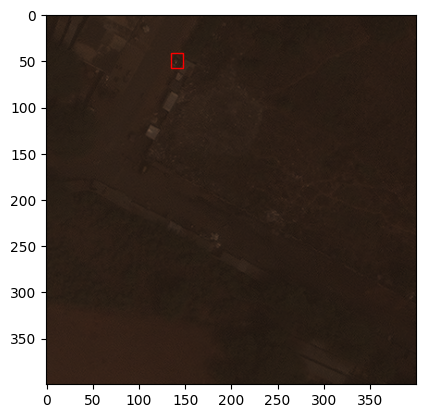

In [41]:
with open("/rds/general/user/jrb21/home/train/slice_valid_images/slice_valid_images_coco.json") as valid_file:
    data_valid = json.load(valid_file)

bboxes = []
for ann in data_valid['annotations']:
    if ann['image_id'] == 5388:
        print(ann)
        bbox = ann['bbox']
        bboxes.append(bbox)
    
im = Image.open('/rds/general/user/jrb21/home/train/slice_valid_images/2509_640_0_1040_400.png')

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)

for x,y,w,h in bboxes:
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    
plt.show()

## Explore the data

In [2]:
with open("/rds/general/user/jrb21/home/train/slice_train_images/slice_train_images_coco.json") as train_file:
    data_train = json.load(train_file)
    
with open("/rds/general/user/jrb21/home/train/slice_valid_images/slice_valid_images_coco.json") as valid_file:
    data_valid = json.load(valid_file)

In [3]:
from collections import defaultdict

counts = defaultdict(int)
for ann in data_train['annotations']:
    image_id = ann['image_id']
    counts[image_id]+=1

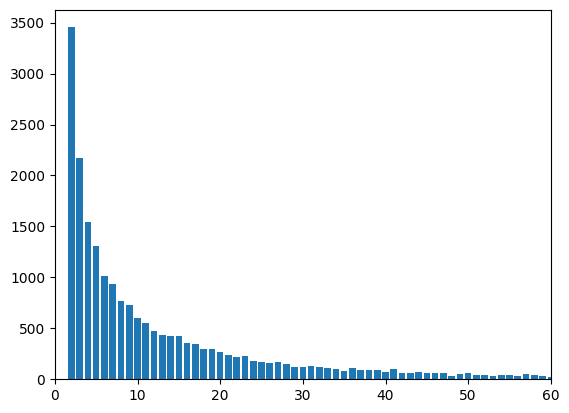

In [4]:
listofcounts = np.bincount(list(counts.values()))

plt.bar(np.arange(1, len(listofcounts) + 1), listofcounts)
plt.xlim(0, 60)
plt.show()

## Trim off some of the negative samples

### Train

In [5]:
from collections import defaultdict
import copy

def trim(data, n):
    annotation_count = defaultdict(int)
    for ann in data['annotations']:
        image_id = ann['image_id']
        annotation_count[image_id]+=1
    
    # Find images with at least n annotations    
    images = []
    for img in data['images']:
        image_id = img['id']
        if annotation_count[image_id] >= n:
            images.append(img)
            
    # find annotations with at least n annotations
    annotations = []
    for ann in data['annotations']:
        image_id = ann['image_id']
        if annotation_count[image_id] >= n:
            annotations.append(ann)
            
    new_data = copy.copy(data)
    new_data['images'] = images
    new_data['annotations'] = annotations
    
    return new_data

In [6]:
new_data_train = trim(data_train, 4)

In [7]:
new_data_valid = trim(data_valid, 4)

### Check the trimmed annotations are correct

In [9]:
def plot_image(n, train, data):
    
    x=data['images'][n]
    
    if train == True:
        path_str = '/rds/general/user/jrb21/home/train/slice_train_images/' + x['file_name']
    else:
        path_str = '/rds/general/user/jrb21/home/train/slice_valid_images/' + x['file_name']
        
    bboxes = []
    for ann in data['annotations']:
        if ann['image_id'] == x['id']:
            bbox = ann['bbox']
            bboxes.append(bbox)

    im = Image.open(path_str)

    # Create figure and axes
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(im)

    for x,y,w,h in bboxes:
        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

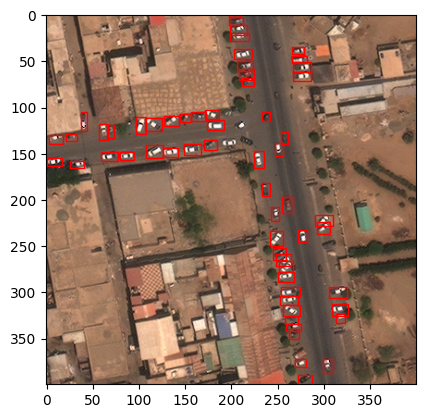

In [10]:
plot_image(n=57, train=True, data=new_data_train)

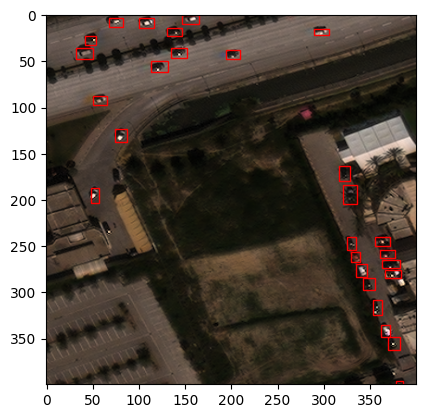

In [11]:
plot_image(n=97, train=False, data=new_data_valid)

### Export the jsons

In [12]:
import json
with open('/rds/general/user/jrb21/home/train/slice_json/trimmed_train.json', 'w') as f:
    json.dump(new_data_train, f)
    
with open('/rds/general/user/jrb21/home/train/slice_json/trimmed_valid.json', 'w') as f:
    json.dump(new_data_valid, f)

### Validation

In [19]:
with open('/rds/general/user/jrb21/home/train/slice_json/trimmed_valid.json', 'w') as f:
    json.dump(new_data_valid, f)